In [40]:
import pandas as pd
import matplotlib.pyplot as plt
df2 = pd.read_csv('data_O0.csv')
df5 = pd.read_csv('io_bandwidth.csv')
df6 = pd.read_csv('file_swap.csv')

In [49]:
variants = ['kij','jki']
dtypes   = ['float','double']
markers  = {'kij':'o','jki':'x'}
linestyles = {'O0':'--','O3':'-'}

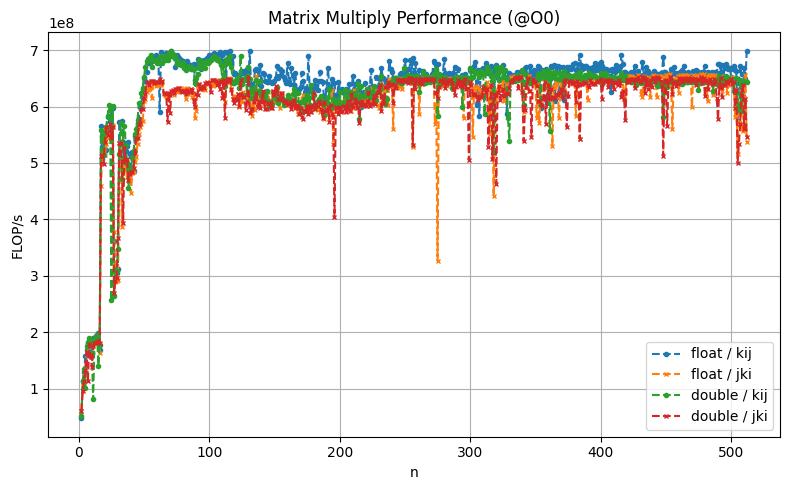

In [50]:
# Plot O0
df0 = pd.read_csv('data_O0.csv')
plt.figure(figsize=(8,5))
for dtype in dtypes:
    for variant in variants:
        sel = (df0['type']==dtype)&(df0['variant']==variant)
        plt.plot(df0.loc[sel,'n'],
                 df0.loc[sel,'flops_per_sec'],
                 marker=markers[variant],
                 linestyle=linestyles['O0'],
                 markersize=3,
                 label=f"{dtype} / {variant}")
plt.title("Matrix Multiply Performance (@O0)")
plt.xlabel("n")
plt.ylabel("FLOP/s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

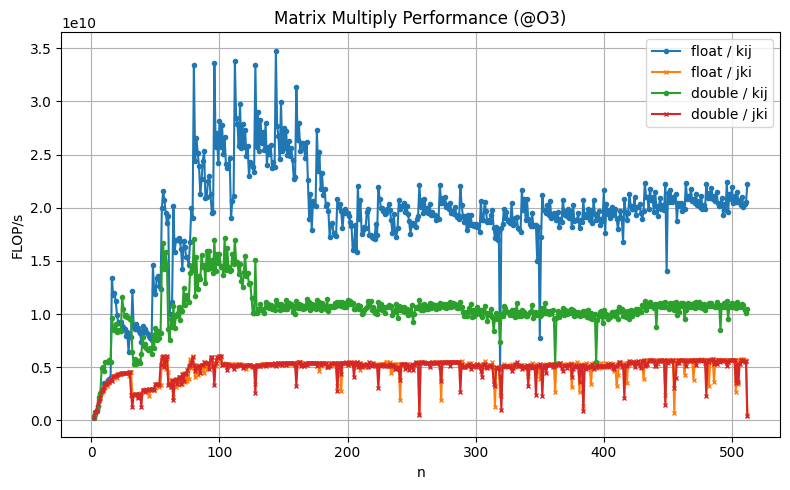

In [51]:
# Plot O3
df3 = pd.read_csv('data_O3.csv')
plt.figure(figsize=(8,5))
for dtype in dtypes:
    for variant in variants:
        sel = (df3['type']==dtype)&(df3['variant']==variant)
        plt.plot(df3.loc[sel,'n'],
                 df3.loc[sel,'flops_per_sec'],
                 marker=markers[variant],
                 linestyle=linestyles['O3'],
                 markersize=3,
                 label=f"{dtype} / {variant}")
plt.title("Matrix Multiply Performance (@O3)")
plt.xlabel("n")
plt.ylabel("FLOP/s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

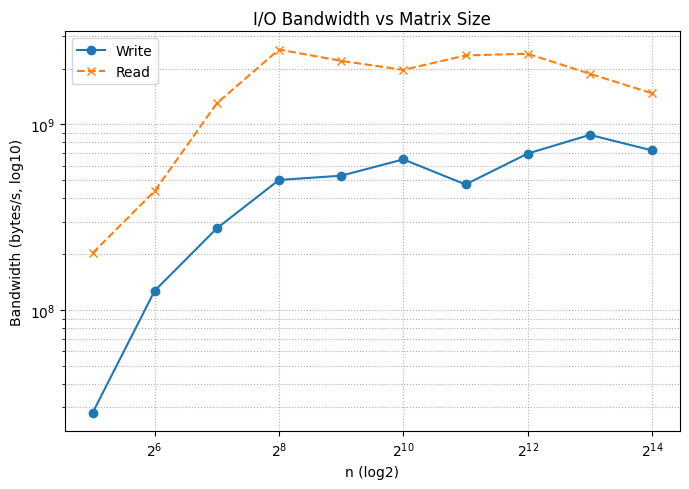

In [43]:
plt.figure(figsize=(7,5))
plt.plot(df5['n'], df5['write_BW'], marker='o', linestyle='-', label='Write')
plt.plot(df5['n'], df5['read_BW'],  marker='x', linestyle='--', label='Read')

plt.xscale('log', base=2)
plt.yscale('log')
plt.title('I/O Bandwidth vs Matrix Size')
plt.xlabel('n (log2)')
plt.ylabel('Bandwidth (bytes/s, log10)')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

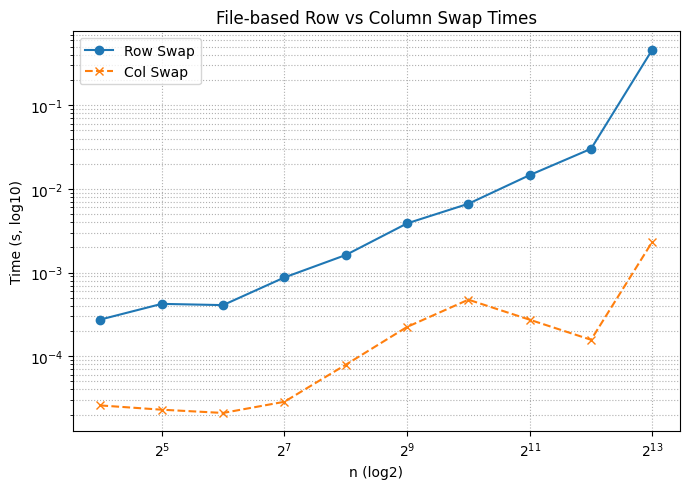

In [44]:
plt.figure(figsize=(7,5))
plt.plot(df6['n'], df6['swapRow_time_s'], marker='o', linestyle='-', label='Row Swap')
plt.plot(df6['n'], df6['swapCol_time_s'], marker='x', linestyle='--', label='Col Swap')
plt.xscale('log', base=2)
plt.yscale('log')
plt.title('File-based Row vs Column Swap Times')
plt.xlabel('n (log2)')
plt.ylabel('Time (s, log10)')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()